**Laboratorio II**  
**Inteligencia Artificial**   
**Andres Guillermo Velasquez Gomez**


El archivo ejemplo regresion.mat contiene los vectores x, y y t. En este ejemplo, x ∈ R (el espacio de entrada es unidimensional), los datos de entrada está agrupados en el vector x, los datos de salida sin ruido están agrupados en el vector y, y los datos de salida con ruido están agrupados en el vector t.
Usando validación cruzada de cinco particiones, evalúe el desempeño de los siguientes algoritmos de regresión en funcíon de M (el número de funciones base), N (el número de datos de entrenamiento), y φ(·) (el tipo de funcíon base),

* Regresión lineal con máxima verosimilitud.

* Regresión lineal con regularización cuadrática. 

* Regresión Bayesiana lineal. 

Reporte la media y desviación estándar de las cinco validaciones. La medida de desempeño es el error cuadrático medio.

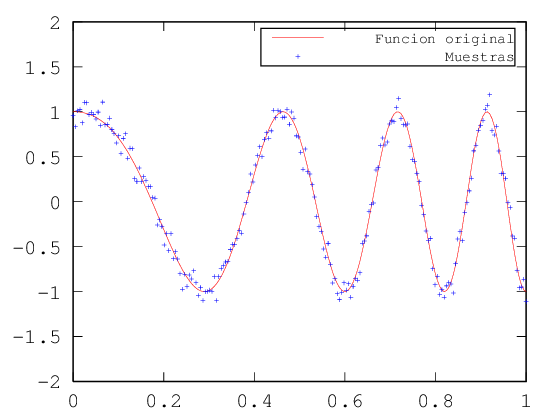

In [140]:
clear all
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;
plot(xNtot,yNtot,'r');
hold on;
ylim([-2 2])
plot(xNtot,tNtot,'+','MarkerSize',2);
h_legend=legend('Funcion original','Muestras');
set(h_legend,'FontSize',7);


#1. Regresión Lineal con máxima verosimilitud

A continuación se calcula la regresion lineal con maxima verosimilitud, variando la cantidad de funciones bases (M) el numero de datos de entrenamiento(N) y el tipo de las funcienes base. 

In [ ]:

tipofb='exp';

Ntot=size(xNtot,1);
N=Ntot/5;
index=randperm(Ntot);

B_test=[];
Mean_aux=[];
std_aux=[];
Mean_result=[];
std_result=[];
for j=1:4
    Mean_aux=[];
    std_aux=[];
    for M=10:10:100
        B_test=[];
        for i=1:5
            t=tNtot(index(1:j*N));
            x=xNtot(index(1:j*N));
            ttest=tNtot(index(j*N+1:end));
            xtest=xNtot(index(j*N+1:end));
           
            [Wml,B]=RLMV(x,t,M,xtest,ttest,tipofb);
            B_test=[B_test B];
            tNtot=[tNtot(index(j*N+1:end)); tNtot(index(1:j*N))];
            xNtot=[xNtot(index(j*N+1:end)); xNtot(index(1:j*N))];            
        end
        Mean_aux=[Mean_aux mean(B_test)];
            std_aux=[std_aux std(B_test)];
    end
    Mean_result=[Mean_result;Mean_aux];
    std_result=[std_result;std_aux];
end

Calculo del error promedio para la la validación cruzada de 5 diviciones utilizado funciones bases exponeciales:
###Funciones Base Exponenciales :
####Media del Error :
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.42966|1.5429|0.33431|0.31964|
|20|3.2915|0.012648|0.84327|0.031416|
|30|2.1727|0.013183|0.010187|0.0092983|
|40|0.045941|0.015817|0.025409|0.0098922|
|50|310.6032|0.031957|0.010288|0.02483|
|60|225.8526|0.045192|0.011731|0.011997|
|70|5.363|0.76969|16.4272|0.014936|
|80|38.8708|0.32543|0.013225|0.018426|
|90|81.1018|0.2445|0.016227|0.011322|
|100|6956.5691|0.08687|0.016829|0.012176|

####Desviacion estandar:

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.13353|2.7703|0.051722|0.027578|
|20|6.9111|0.0021158|1.8592|0.04174|
|30|3.5484|0.005592|0.0009137|0.001209|
|40|0.041782|0.0031064|0.023521|0.0016325|
|50|693.5123|0.020441|0.0011731|0.034338|
|60|352.8351|0.042113|0.0028908|0.0023085|
|70|8.5472|1.6621|36.7026|0.0043675|
|80|86.3708|0.43615|0.0022092|0.013896|
|90|139.9689|0.50487|0.0057557|0.0030227|
|100|14228.3233|0.14098|0.0043969|0.0022975|


###Funciones Base Polinomicas :

#### Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.38292|1.7925|0.39981|0.24724|
|20|34.9734|0.29864|0.058969|0.016533|
|30|1.55|0.013051|103.1507|0.0253|
|40|96.6696|14.0736|0.01891|0.012514|
|50|160.0123|0.329|0.033471|0.010521|
|60|0.11989|156.0234|0.21425|0.013119|
|70|330.1003|205.652|890898.8277|0.44887|
|80|162.7966|21118.3405|0.81937|0.0097191|
|90|52120.1562|3.9269|290.0677|0.0096464|
|100|1660638379.2835|25061.6211|0.13301|0.0091222|

####Desviacion Estandar : 

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.14252|3.1302|0.3684|0.041155|
|20|77.5283|0.5689|0.09803|0.003173|
|30|2.2927|0.0030408|230.5734|0.030252|
|40|215.7554|22.008|0.013308|0.0064304|
|50|217.9143|0.55683|0.020671|0.0026219|
|60|0.1276|348.7078|0.45751|0.0045396|
|70|714.7825|448.3395|1992102.7661|0.98321|
|80|356.6743|47139.34|1.7804|0.001554|
|90|68681.5563|7.2807|648.5063|0.0016909|
|100|3713298491.4579|56032.7759|0.27133|0.0014658|

###Funciones Base Tan :
#### Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.1877|1.1028|0.1663|0.15465|
|20|0.5553|0.014971|0.027931|0.011012|
|30|44.3715|0.017187|0.010394|0.019497|
|40|0.10406|0.01399|0.012031|0.011119|
|50|6.794|0.029312|0.010285|0.01294|
|60|1.1417|0.046115|0.011683|0.011826|
|70|0.739|0.27566|7.0459|0.084147|
|80|18.8297|0.39128|0.01336|0.014853|
|90|179.0899|0.017862|0.014344|0.012044|
|100|25902.2357|0.027553|0.018115|0.041577|

####Desviacion Estandar : 
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.052094|2.0536|0.052506|0.019287|
|20|0.94066|0.0054297|0.035555|0.0029802|
|30|99.1778|0.014849|0.0013218|0.02133|
|40|0.18502|0.0016165|0.0053704|0.0028691|
|50|10.5144|0.015479|0.0012603|0.0060017|
|60|1.0117|0.072074|0.0021037|0.0020925|
|70|1.0753|0.49928|15.7236|0.16164|
|80|25.67|0.78075|0.0035433|0.0045223|
|90|397.3242|0.0037232|0.0066974|0.0033715|
|100|57909.3149|0.017044|0.011406|0.071404|


Calculo de PHI para los datos de entrenamiento.

Se calcula la solucion de maxima verosimilitud para w y beta.

Calculemos la prediccion sobre todo el espacio de entrada y se grafica

#2. Regresión Lineal con máxima verosimilitud y regularizacion cuadratica

In [145]:
%reset workspace
clear all
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;

In [146]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=50;
PHI=genBasisFunction(tipofb,xNtot,Ntot,M);
%plot(xNtot, PHI, 'linewidth', 1.5)

Calculamos PHI para los datos de entrenamiento.

In [147]:
PHI_train=genBasisFunction(tipofb,x,N,M);

Se calcula la solucion de maxima verosimilitud con regularización para w y beta.

In [148]:
lamda=0.004;
Wml=inv(lamda*eye(M)+PHI_train'*PHI_train)*PHI_train'*t;
B=(1/N)*(t-PHI_train*Wml)'*(t-PHI_train*Wml);

Calculemos la prediccion sobre todo el espacio de entrada y se grafica

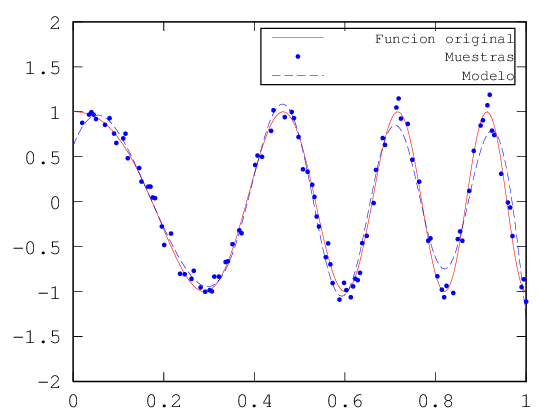

In [149]:
plot(xNtot, yNtot, 'r',x, t, '.b',xNtot,PHI*Wml,'--');
h_legend=legend('Funcion original','Muestras','Modelo');
set(h_legend,'FontSize',7);
ylim([-2 2]);

#3. Regresíon Bayesiana lineal

In [150]:
%reset workspace

clear all
plot_variance = @(x,lower,upper,color) set(fill([x,x(end:-1:1)],[upper,lower(end:-1:1)],'b'),'EdgeColor',color,'FaceAlpha',0.3,'EdgeAlpha',0.3);
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;

Se separan los datos de entrenamiento y validación.

In [151]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=30;
ttest = tNtot(index(N+1:end));
xtest = xNtot(index(N+1:end));

Se calcula la matriz de diseño para lso datos de entrenamiento.

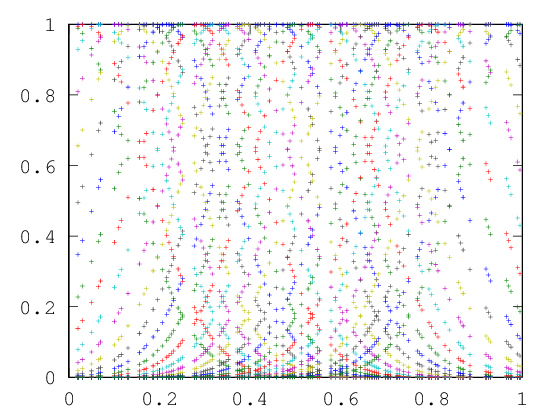

In [152]:
PHI=genBasisFunction(tipofb,x,N,M);
plot(x, PHI,'+','MarkerSize',2);

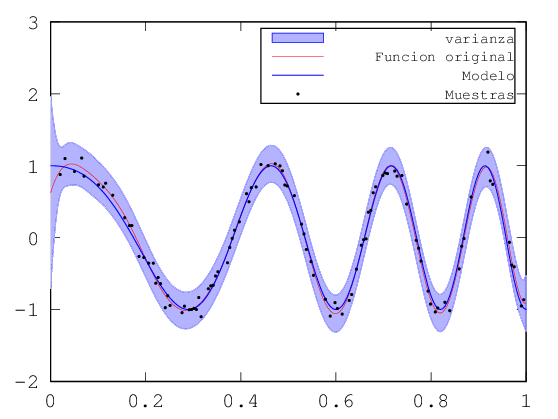

In [153]:
[alpha,betae]=findAlphaBeta(PHI,M,N,t);

PHIt = genBasisFunction(tipofb,xNtot,Ntot,M);
SnInv = alpha*(length(x)) + betae*(PHI'*PHI);
Sn = SnInv\eye(M);
mn = betae*(Sn*PHI'*t);
mean_pre=PHIt*mn;
varianza=inv(betae*eye(length(xNtot)))+PHIt*Sn*PHIt';
varianza=diag(sqrt(varianza'));
figure
hold on
plot_variance(xNtot',(mean_pre-2*varianza)',(mean_pre+2*varianza)',[1 1 1])
plot(xNtot,mean_pre,'r')
plot(xNtot, yNtot, 'b', 'linewidth', 1.5)
plot(x, t, '.k', 'markersize', 4)
set(gca, 'ylim', [-2 3])
h_legend=legend('varianza','Funcion original','Modelo','Muestras');
set(h_legend,'FontSize',7);